In [1]:
import tensorflow as tf


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: DLL load failed: The specified module could not be found.

In [4]:
df = pd.read_csv("C:\\Users\\dhruven\\cancer_classification.csv")

In [14]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [162]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [1]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True)

NameError: name 'plt' is not defined

In [21]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [23]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(455, 30)

In [188]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [189]:
model = Sequential()

In [190]:
model.add(Dense(units = 30,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [191]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/600
455/455 [==============================] - 0s 350us/step - loss: 0.7216 - val_loss: 0.6656
Epoch 2/600
455/455 [==============================] - 0s 51us/step - loss: 0.6689 - val_loss: 0.6354
Epoch 3/600
455/455 [==============================] - 0s 96us/step - loss: 0.6386 - val_loss: 0.6081
Epoch 4/600
455/455 [==============================] - 0s 61us/step - loss: 0.6099 - val_loss: 0.5826
Epoch 5/600
455/455 [==============================] - 0s 59us/step - loss: 0.5880 - val_loss: 0.5540
Epoch 6/600
455/455 [==============================] - 0s 66us/step - loss: 0.5650 - val_loss: 0.5204
Epoch 7/600
455/455 [==============================] - 0s 64us/step - loss: 0.5632 - val_loss: 0.4879
Epoch 8/600
455/455 [==============================] - 0s 64us/step - loss: 0.5412 - val_loss: 0.4666
Epoch 9/600
455/455 [==============================] - 0s 64us/step - loss: 0.5252 - val_loss: 0.4436
Epoch 10/600
455/455 [=============

455/455 [==============================] - 0s 56us/step - loss: 0.1044 - val_loss: 0.0529
Epoch 160/600
455/455 [==============================] - 0s 54us/step - loss: 0.0726 - val_loss: 0.0565
Epoch 161/600
455/455 [==============================] - 0s 55us/step - loss: 0.0856 - val_loss: 0.0530
Epoch 162/600
455/455 [==============================] - 0s 61us/step - loss: 0.0744 - val_loss: 0.0526
Epoch 163/600
455/455 [==============================] - 0s 57us/step - loss: 0.0813 - val_loss: 0.0525
Epoch 164/600
455/455 [==============================] - 0s 67us/step - loss: 0.0888 - val_loss: 0.0547
Epoch 165/600
455/455 [==============================] - 0s 58us/step - loss: 0.0754 - val_loss: 0.0504
Epoch 166/600
455/455 [==============================] - 0s 53us/step - loss: 0.0770 - val_loss: 0.0514
Epoch 167/600
455/455 [==============================] - 0s 60us/step - loss: 0.0842 - val_loss: 0.0509
Epoch 168/600
455/455 [==============================] - 0s 61us/step - loss: 

Epoch 238/600
455/455 [==============================] - 0s 66us/step - loss: 0.0581 - val_loss: 0.0557
Epoch 239/600
455/455 [==============================] - 0s 55us/step - loss: 0.0775 - val_loss: 0.0560
Epoch 240/600
455/455 [==============================] - 0s 57us/step - loss: 0.0611 - val_loss: 0.0527
Epoch 241/600
455/455 [==============================] - 0s 66us/step - loss: 0.0876 - val_loss: 0.0561
Epoch 242/600
455/455 [==============================] - 0s 61us/step - loss: 0.0660 - val_loss: 0.0572
Epoch 243/600
455/455 [==============================] - 0s 60us/step - loss: 0.0617 - val_loss: 0.0538
Epoch 244/600
455/455 [==============================] - 0s 57us/step - loss: 0.0589 - val_loss: 0.0524
Epoch 245/600
455/455 [==============================] - 0s 63us/step - loss: 0.0652 - val_loss: 0.0528
Epoch 246/600
455/455 [==============================] - 0s 55us/step - loss: 0.0840 - val_loss: 0.0621
Epoch 247/600
455/455 [==============================] - 0s 59us

Epoch 317/600
455/455 [==============================] - 0s 64us/step - loss: 0.0524 - val_loss: 0.0650
Epoch 318/600
455/455 [==============================] - 0s 57us/step - loss: 0.0520 - val_loss: 0.0753
Epoch 319/600
455/455 [==============================] - 0s 50us/step - loss: 0.0503 - val_loss: 0.0610
Epoch 320/600
455/455 [==============================] - 0s 59us/step - loss: 0.0550 - val_loss: 0.0590
Epoch 321/600
455/455 [==============================] - 0s 55us/step - loss: 0.0659 - val_loss: 0.0644
Epoch 322/600
455/455 [==============================] - 0s 57us/step - loss: 0.0507 - val_loss: 0.0613
Epoch 323/600
455/455 [==============================] - 0s 50us/step - loss: 0.0362 - val_loss: 0.0590
Epoch 324/600
455/455 [==============================] - 0s 59us/step - loss: 0.0478 - val_loss: 0.0563
Epoch 325/600
455/455 [==============================] - 0s 53us/step - loss: 0.0531 - val_loss: 0.0546
Epoch 326/600
455/455 [==============================] - 0s 53us

Epoch 396/600
455/455 [==============================] - 0s 66us/step - loss: 0.0351 - val_loss: 0.0687
Epoch 397/600
455/455 [==============================] - 0s 58us/step - loss: 0.0496 - val_loss: 0.0619
Epoch 398/600
455/455 [==============================] - 0s 54us/step - loss: 0.0418 - val_loss: 0.0646
Epoch 399/600
455/455 [==============================] - ETA: 0s - loss: 0.009 - 0s 57us/step - loss: 0.0356 - val_loss: 0.0638
Epoch 400/600
455/455 [==============================] - 0s 57us/step - loss: 0.0388 - val_loss: 0.0577
Epoch 401/600
455/455 [==============================] - 0s 57us/step - loss: 0.0453 - val_loss: 0.0566
Epoch 402/600
455/455 [==============================] - 0s 59us/step - loss: 0.0386 - val_loss: 0.0564
Epoch 403/600
455/455 [==============================] - 0s 55us/step - loss: 0.0288 - val_loss: 0.0625
Epoch 404/600
455/455 [==============================] - 0s 61us/step - loss: 0.0522 - val_loss: 0.0759
Epoch 405/600
455/455 [=================

455/455 [==============================] - 0s 57us/step - loss: 0.0250 - val_loss: 0.0712
Epoch 553/600
455/455 [==============================] - 0s 57us/step - loss: 0.0325 - val_loss: 0.0876
Epoch 554/600
455/455 [==============================] - 0s 59us/step - loss: 0.0318 - val_loss: 0.0816
Epoch 555/600
455/455 [==============================] - 0s 53us/step - loss: 0.0343 - val_loss: 0.0760
Epoch 556/600
455/455 [==============================] - 0s 64us/step - loss: 0.0201 - val_loss: 0.0672
Epoch 557/600
455/455 [==============================] - 0s 61us/step - loss: 0.0309 - val_loss: 0.0684
Epoch 558/600
455/455 [==============================] - 0s 56us/step - loss: 0.0269 - val_loss: 0.0740
Epoch 559/600
455/455 [==============================] - 0s 57us/step - loss: 0.0140 - val_loss: 0.0758
Epoch 560/600
455/455 [==============================] - 0s 61us/step - loss: 0.0312 - val_loss: 0.0684
Epoch 561/600
455/455 [==============================] - 0s 55us/step - loss: 

In [192]:
loss = pd.DataFrame(model.history.history)

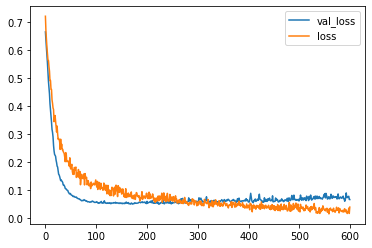

In [193]:
loss.plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [217]:
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[41  2]
 [ 2 69]]


In [194]:
model.add(Dense(units = 30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [195]:
from tensorflow.keras.callbacks import EarlyStopping

In [196]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [197]:
model.fit(X_train,y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 455 samples, validate on 114 samples
Epoch 1/250
455/455 [==============================] - 0s 615us/step - loss: 0.6481 - val_loss: 0.6231
Epoch 2/250
455/455 [==============================] - 0s 98us/step - loss: 0.6080 - val_loss: 0.5812
Epoch 3/250
455/455 [==============================] - 0s 94us/step - loss: 0.5635 - val_loss: 0.5418
Epoch 4/250
455/455 [==============================] - 0s 85us/step - loss: 0.5267 - val_loss: 0.5034
Epoch 5/250
455/455 [==============================] - 0s 88us/step - loss: 0.4843 - val_loss: 0.4620
Epoch 6/250
455/455 [==============================] - 0s 85us/step - loss: 0.4451 - val_loss: 0.4266
Epoch 7/250
455/455 [==============================] - 0s 85us/step - loss: 0.4191 - val_loss: 0.3935
Epoch 8/250
455/455 [==============================] - 0s 84us/step - loss: 0.3796 - val_loss: 0.3604
Epoch 9/250
455/455 [==============================] - 0s 89us/step - loss: 0.3421 - val_loss: 0.3294
Epoch 10/250
455/455 [=============

In [198]:
loss = pd.DataFrame(model.history.history)

<Figure size 864x864 with 0 Axes>

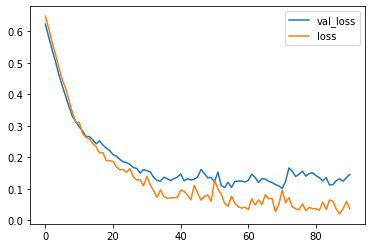

In [218]:
plt.figure(figsize=(12,12))
loss.plot()

In [200]:
pred = model.predict_classes(X_test)

In [201]:
from sklearn.metrics import classification_report,confusion_matrix

In [202]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [203]:
print(confusion_matrix(y_test,pred))

[[41  2]
 [ 2 69]]


In [212]:
patient = df.drop('benign_0__mal_1',axis=1).iloc[48]

In [213]:
patient
df.shape

(569, 31)

In [214]:
patient = scaler.transform(patient.values.reshape(-1,30))

In [215]:
model.predict_classes(patient)

array([[1]])